# 1. PURPOSE :  Is user growing in India ?

# 2. HYPOTHESIS: 

### 2.1 User growth may related to downloads / growth rate of downloads / using period / activity 
### 2.2 If business is getting better, then the average of "days_active" of user should raise 
### 2.3 Similar as above, if business good, uninstalled, uninstall_date should decline 
### 2.4 Compare with other cities' data 

# 3. INDEX : 
## 2.1 DATA PREPARATION 
## 2.2 DATA CLEANING 
## 2.3 GENERAL ANALYSIS
- 2.3.1 Downloads
- 2.3.2 USING PERIOD
- 2.3.3 USING LOCATION




## 2.4 SUMMARY 



# 4. OBSERVATIONS:


In [1]:
import sqlite3
import datetime as dt   
import time
import csv
import requests
import pandas as pd, numpy as np
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# 2.1 DATA PREPARATION

In [2]:
# helper functions

def sqlite_test():
	try:
		conn = sqlite3.connect('/Users/GGV/Desktop/traffic.db')
		c = conn.cursor()
		query = "select * from trafi limit 10 ;"
		df = pd.read_sql_query(query, conn)
		print (df)
		print ("Sqlite connect OK")
	except:
		print ("Sqlite connect failed")




def sqlite_query_df(query):
	try:
		conn = sqlite3.connect('/Users/GGV/Desktop/traffic.db')
		c = conn.cursor()
		df = pd.read_sql_query(query, conn)
		print ("Sqlite connect OK")
		return df 
	except:
		print ("Sqlite connect failed")

In [90]:
query= '''

with avg_days_active as (
select 
install_date, 
avg(days_active) as avg_active_day
from trafi
where country == 'IN'
group by install_date

)


select 

avg_days_active.avg_active_day,
julianday(trafi.last_session_date) -  julianday(trafi.install_date ) as using_period, 
julianday(trafi.uninstall_date) -  julianday(trafi.install_date ) as install_uninstall_period, 
trafi.*
from trafi

join avg_days_active on avg_days_active.install_date = trafi.install_date




'''
df = sqlite_query_df(query)

Sqlite connect OK


In [91]:
df[['install_date', 'avg_active_day', 'days_active']].sort('install_date')

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,install_date,avg_active_day,days_active
76628,2014-09-14,2.0,22
31404,2014-09-14,2.0,3
32378,2014-09-14,2.0,6
30673,2014-09-14,2.0,2
43591,2014-09-14,2.0,8
73687,2014-09-14,2.0,29
82444,2014-09-14,2.0,2
70406,2014-09-14,2.0,221
92037,2014-09-14,2.0,31
88647,2014-09-14,2.0,119


#  2.2 DATA CLEANING

In [92]:
df.groupby('country').count()['uid']

country
-other     1644
BR        20206
EE          833
ID         3606
IN         9443
LT         6157
LV         1007
RU        12356
TR        24870
TW        15069
US          207
Name: uid, dtype: int64

In [93]:
df_india= df[df['country'] =='IN']

In [94]:
len(df_india)

9443

# 2.3 GENERAL ANALYSIS 

# 2.3.1  Downloads 

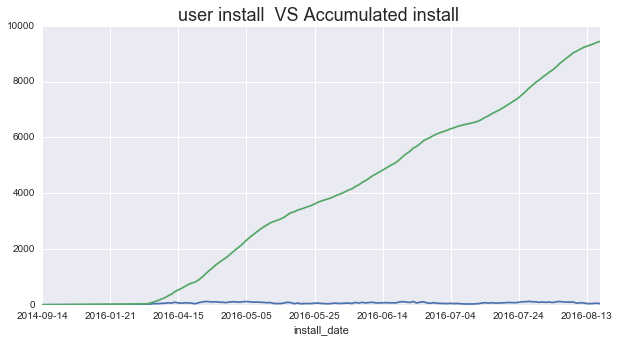

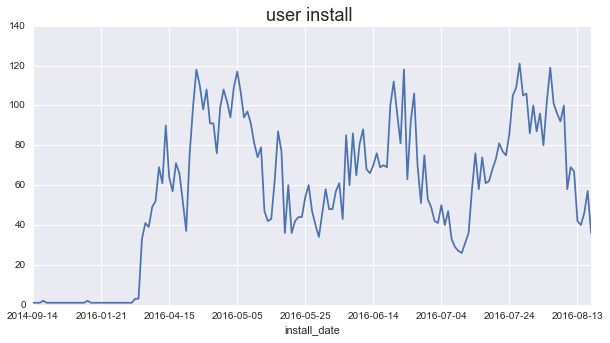

In [95]:
df_india.groupby('install_date').count()['uid'].plot(figsize=(10, 5))
df_india.groupby('install_date').count().cumsum()['device_uuid'].plot(figsize=(10, 5))
plt.title('user install  VS Accumulated install ',fontsize=18)

plt.show()


df_india.groupby('install_date').count()['uid'].plot(figsize=(10, 5))
plt.title('user install ',fontsize=18)

In [96]:
df_india.groupby('uninstalled').count()['device_uuid']

uninstalled
0    6998
1    2445
Name: device_uuid, dtype: int64

In [97]:
df_india.groupby('activated').count()['device_uuid']

activated
0    5575
1    3868
Name: device_uuid, dtype: int64

##  2.3.1 USING PERIOD 

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


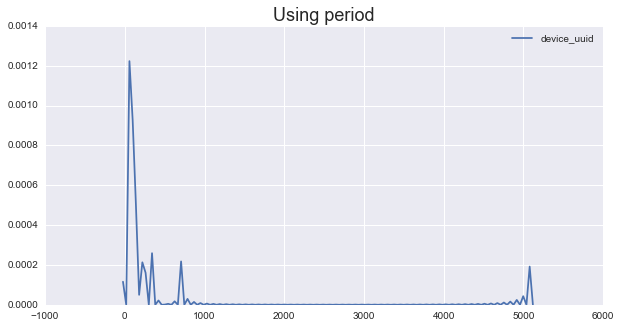

In [98]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df_india.groupby('using_period').count()['device_uuid'])
plt.title('Using period',fontsize=18)



plt.show()

## 2.3.3 ACTIVE DAYS 

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


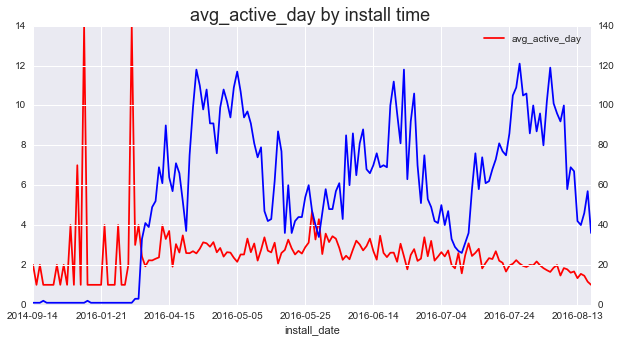

In [99]:
# red line :  AVG active day by install time
# blue line :  Number of installation



ax = df_india[['install_date','avg_active_day']].sort('install_date').drop_duplicates('install_date').set_index('install_date').plot(figsize=(10, 5), color='r')
plt.title('avg_active_day by install time ',fontsize=18)

ax2= ax.twinx()


df_india.groupby('install_date').count()['uid'].plot(figsize=(10, 5), color='b')

plt.show()


## 2.3.3 UNINSTALL DATE 

In [112]:
df_india[['install_date','install_uninstall_period','using_period','uninstalled', 'uninstall_date']].dropna().sort('install_date').set_index('install_date')['install_uninstall_period']

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


install_date
2014-10-09    182.0
2015-05-13      3.0
2015-05-13      1.0
2015-05-14      1.0
2015-06-20      5.0
2015-06-23      1.0
2015-07-06     69.0
2015-07-30     72.0
2015-10-04      1.0
2015-10-19     96.0
2015-11-10      0.0
2015-12-19      1.0
2015-12-26      0.0
2015-12-28      1.0
2016-01-21     27.0
2016-02-11      1.0
2016-02-16      1.0
2016-02-18      0.0
2016-02-20     44.0
2016-03-04      0.0
2016-03-23     62.0
2016-04-06      1.0
2016-04-07      7.0
2016-04-07      2.0
2016-04-07     23.0
2016-04-07      4.0
2016-04-07      2.0
2016-04-07      1.0
2016-04-07      0.0
2016-04-07      2.0
              ...  
2016-06-06      1.0
2016-06-06      1.0
2016-06-06      0.0
2016-06-06      1.0
2016-06-06      0.0
2016-06-06      0.0
2016-06-06      0.0
2016-06-07      0.0
2016-06-07      0.0
2016-06-07      0.0
2016-06-07      0.0
2016-06-07      1.0
2016-06-07      0.0
2016-06-07      1.0
2016-06-07      1.0
2016-06-07      1.0
2016-06-07      0.0
2016-06-07      1.0
2016-06

## 2.3.3 USING LOCATION

In [101]:
df_india.groupby('UserLocation').count()['uid']

UserLocation
                 1694
bangalore        3157
belohorizonte       3
chelyabinsk         1
istanbul            5
jakarta             4
jelgava             1
klaipeda            1
mumbai           2910
newyork             2
pune             1591
riga                1
rio                15
saopaulo           44
tainan              1
taipei              4
tallinn             7
vilnius             2
Name: uid, dtype: int64

In [102]:
df_india[['days_active','using_period','uninstalled', 'uninstall_date']]

,days_active,using_period,uninstalled,uninstall_date
4,1,0.0,1,2016-05-01
13,13,58.0,0,
21,1,0.0,0,
22,3,22.0,0,
38,7,40.0,0,
39,3,3.0,0,
58,5,55.0,0,
62,2,11.0,0,
69,1,0.0,1,2016-05-03
75,1,0.0,0,


In [103]:
df_india.groupby(['install_date' ,'uninstall_date',']).count()

avg_active_day  using_period  \
uninstall_date install_date                                 
               2014-09-14                 1             1   
               2015-02-20                 1             1   
               2015-06-04                 1             1   
               2015-06-16                 1             1   
               2015-07-11                 1             1   
               2015-11-24                 1             1   
               2015-12-19                 1             1   
               2016-01-10                 1             1   
               2016-02-09                 1             1   
               2016-02-22                 1             1   
               2016-03-28                 1             1   
               2016-04-02                 3             3   
               2016-04-06                 2             2   
               2016-04-07                11            11   
               2016-04-08                13            13   
               2016-04-09                13            13   
               2016-04-10                13            13   
               2016-04-11                15            15   
               2016-04-12                20            20   
               2016-04-13                20            20   
               2016-04-14                40            40   
               2016-04-15                30            30   
               2016-04-16                16            16   
               2016-04-17                24            24   
               2016-04-18                29            29   
               2016-04-19                26            26   
               2016-04-20                12            12   
               2016-04-21                30            30   
               2016-04-22                39            39   
               2016-04-23                31            31   
...                                     ...           ...   
2016-06-07     2016-06-02                 1             1   
               2016-06-03                 3             3   
               2016-06-04                 4             4   
               2016-06-05                 2             2   
               2016-06-06                12            12   
               2016-06-07                 9             9   
2016-06-08     2016-04-20                 2             2   
               2016-04-25                 1             1   
               2016-04-26                 2             2   
               2016-05-06                 2             2   
               2016-05-07                 1             1   
               2016-05-09                 1             1   
               2016-05-10                 1             1   
               2016-05-11                 1             1   
               2016-05-12                 1             1   
               2016-05-23                 1             1   
               2016-05-24                 2             2   
               2016-05-25                 2             2   
               2016-05-26                 1             1   
               2016-05-27                 1             1   
               2016-05-29                 1             1   
               2016-05-30                 2             2   
               2016-05-31                 1             1   
               2016-06-01                 1             1   
               2016-06-03                 2             2   
               2016-06-04                 1             1   
               2016-06-05                 1             1   
               2016-06-06                 4             4   
               2016-06-07                 6             6   
               2016-06-08                 8             8   

                             install_uninstall_period  row ID  device_uuid  \
uninstall_date install_date                                                  
               2014-09-14    